In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/titanic_toy.csv")
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [ ]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [ ]:
X_train

Age      Fare  Family
30   40.0   27.7208       0
10    4.0   16.7000       2
873  47.0    9.0000       0
182   9.0   31.3875       6
876  20.0    9.8458       0
..    ...       ...     ...
534  30.0    8.6625       0
584   NaN    8.7125       0
493  71.0   49.5042       0
527   NaN  221.7792       0
168   NaN   25.9250       0

[712 rows x 3 columns]

In [ ]:
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)

X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)
X_train['Fare_median']=X_train['Fare'].fillna(median_fare)

In [ ]:
X_train

Age      Fare  Family   Age_mean  Age_median  Fare_mean  Fare_median
30   40.0   27.7208       0  40.000000       40.00    27.7208      27.7208
10    4.0   16.7000       2   4.000000        4.00    16.7000      16.7000
873  47.0    9.0000       0  47.000000       47.00     9.0000       9.0000
182   9.0   31.3875       6   9.000000        9.00    31.3875      31.3875
876  20.0    9.8458       0  20.000000       20.00     9.8458       9.8458
..    ...       ...     ...        ...         ...        ...          ...
534  30.0    8.6625       0  30.000000       30.00     8.6625       8.6625
584   NaN    8.7125       0  29.785904       28.75     8.7125       8.7125
493  71.0   49.5042       0  71.000000       71.00    49.5042      49.5042
527   NaN  221.7792       0  29.785904       28.75   221.7792     221.7792
168   NaN   25.9250       0  29.785904       28.75    25.9250      25.9250

[712 rows x 7 columns]

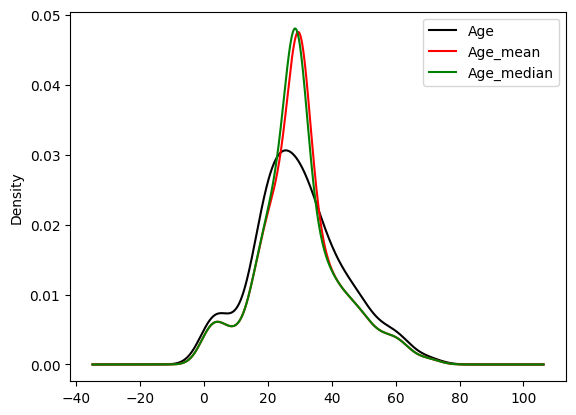

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Age'].plot(kind='kde',ax=ax,color='black')
# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
# variable imputed with the median
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')
#add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<ipython-input-25-a72092ee0365>:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(labels,lines,loc='best')


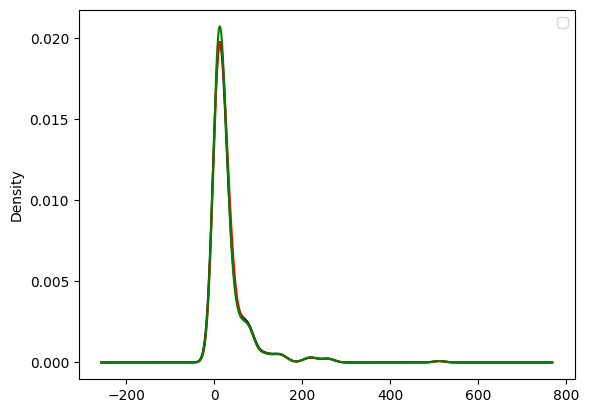

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Fare'].plot(kind='kde',ax=ax,color='black')
# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')
# variable imputed with the median
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')
#add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(labels,lines,loc='best')

In [ ]:
X_train.cov()

Age         Fare     Family    Age_mean  Age_median  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917   55.603719   57.957599   
Family        -6.498901    17.258917   2.735252   -5.146106   -5.112563   
Age_mean     204.349513    55.603719  -5.146106  161.812625  161.812625   
Age_median   204.349513    57.957599  -5.112563  161.812625  161.989566   
Fare_mean     66.665205  2448.197914  16.385048   52.788341   55.023037   
Fare_median   64.858859  2448.197914  16.476305   51.358000   53.553455   

               Fare_mean  Fare_median  
Age            66.665205    64.858859  
Fare         2448.197914  2448.197914  
Family         16.385048    16.476305  
Age_mean       52.788341    51.358000  
Age_median     55.023037    53.553455  
Fare_mean    2324.238526  2324.238526  
Fare_median  2324.238526  2340.091022

In [ ]:
X_train.corr()

Age      Fare    Family  Age_mean  Age_median  Fare_mean  \
Age          1.000000  0.092644 -0.299113  1.000000    1.000000   0.090156   
Fare         0.092644  1.000000  0.208268  0.088069    0.091757   1.000000   
Family      -0.299113  0.208268  1.000000 -0.244610   -0.242883   0.205499   
Age_mean     1.000000  0.088069 -0.244610  1.000000    0.999454   0.086078   
Age_median   1.000000  0.091757 -0.242883  0.999454    1.000000   0.089673   
Fare_mean    0.090156  1.000000  0.205499  0.086078    0.089673   1.000000   
Fare_median  0.087356  1.000000  0.205942  0.083461    0.086982   0.996607   

             Fare_median  
Age             0.087356  
Fare            1.000000  
Family          0.205942  
Age_mean        0.083461  
Age_median      0.086982  
Fare_mean       0.996607  
Fare_median     1.000000

<Axes: >

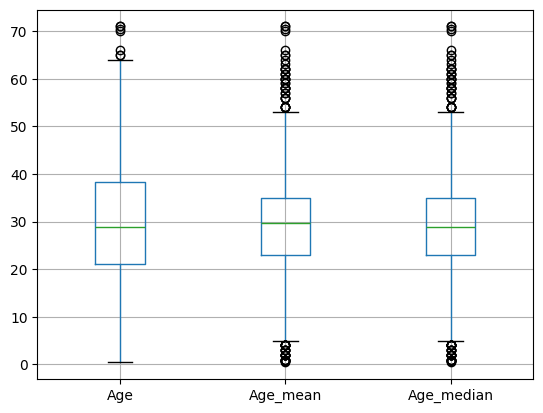

In [ ]:
X_train[["Age","Age_mean","Age_median"]].boxplot()

# Using Sklearn

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [ ]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [ ]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([14.4583])

In [ ]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])